<a href="https://colab.research.google.com/github/stokljos/project-1/blob/master/450_Project1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import csv
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import zlib
import datetime

# Oregon Shelf Surface Piercing Profiler Mooring (Winter)

Get data file from Github

In [0]:
url = 'https://raw.githubusercontent.com/stokljos/project-1/master/Winter%20Oregon%20Profiler.csv' #winter

Convert Data frm csv to dataframe

In [0]:
df = pd.read_csv(url) #converts to dataframe

Seperate Columns to values needed

In [0]:
p = df['pressure'] 
s = df['salinity_qc_results']
t = df['temperature']
d = df['density']

Find depth and Speed of Sounds values

In [0]:
h = (p*10000)/(d*9.81) #equation to find depth
ssp = 1449.2+(4.6*t)-(0.055*(t*t))+(0.00029*(t*t*t))+((1.34-(0.01*t))*(s-35))+(0.016*h) #speed of sound equation

Convert Dataframes to arrays of values

In [0]:
x = h.values #depth
y = ssp.values #speed of sound

Find Number of dives and Where Each index is of each Dive

In [0]:
f = 1 #number of dives
v = [] #array to put the index of each dive into
for d in range (len(x)): #this for loop finds where each dive occurs and tallies them
  if d!=0 and x[d] > x[d-1] + 10:
    f += 1
    v.append(d) #Index of each dive
  else:
    continue

Split arrays at each dive according to their index

In [0]:
graphx = np.split(x,v) #this splits the depth list into multiple arrays according to each dive
graphy = np.split(y,v) #this splits the ssp values according to each dive

Find max value of each dive

In [0]:
r = [] # max ssp values for each dive
for e in range (0,f):
  r.append(max(graphy[e]))


Find Average value of all the dives at each depth value

In [0]:
g = 0
y2 = [] #where the avg ssp value is stored
x2 = [] #where the avg depth value is stored
while g < len(x):
  yvalue = 0
  xvalue = 0
  q = 0
  for i in range (0,f):
    if len(graphy[i][:]) <= g:
      q +=1
      continue
    else:
      yvalue +=  graphy[i][g] #adds each ssp value of the same index of each dive
      xvalue +=  graphx[i][g] #adds each depth of the same index of each dive
  if (f-q) != 0:
    yavg = yvalue/(f-q) #this finds the average of each index at each point of all dives
    xavg = xvalue/(f-q) #this finds the average of each index at each point of all dives
    y2.append(yavg) #this is where the ssp avg is stored
    x2.append(xavg) #this is where the depth is stored
    g += 1
  else:
    break

Plot Dives against speed of sound

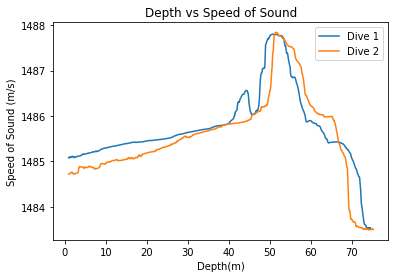

In [11]:
for i in range (0,f): #for loop to plot each dive on the same graph
  plt.plot(graphx[i], graphy[i],label = "Dive %d" %(i+1))
plt.legend()
plt.xlabel('Depth(m)')
plt.ylabel('Speed of Sound (m/s)')
plt.title('Depth vs Speed of Sound')
plt.show()

Plot average of all the dives at each Depth value

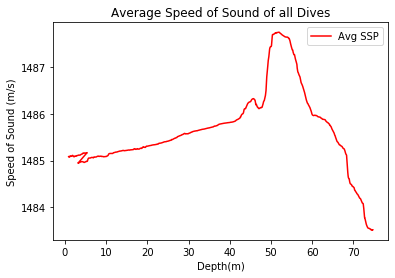

In [12]:
plt.plot(x2, y2,label = "Avg SSP", color = 'red')
plt.legend()
plt.xlabel('Depth(m)')
plt.ylabel('Speed of Sound (m/s)')
plt.title('Average Speed of Sound of all Dives')
plt.show()

Print max speed of sound value of each Dive

In [13]:
for i in range(0,f):
  print('The max ssp value for Dive %d is %d m/s' %((i+1), r[i]))

The max ssp value for Dive 1 is 1487 m/s
The max ssp value for Dive 2 is 1487 m/s


# Oregon Shelf Surface Piercing Profiler Mooring (Summer)

NOTE: The cells of the sections to come follow the same format as the first section.

In [0]:
url = 'https://raw.githubusercontent.com/stokljos/project-1/master/Summer%20Oregon%20pierce%20profiler.csv' #summer

In [0]:
df = pd.read_csv(url)

In [0]:
p = df['pressure'] 
s = df['salinity_qc_results']
t = df['temperature']
d = df['density']

In [0]:
h = (p*10000)/(d*9.81) #equation to find depth
ssp = 1449.2+(4.6*t)-(0.055*(t*t))+(0.00029*(t*t*t))+((1.34-(0.01*t))*(s-35))+(0.016*h) #speed of sound equation

In [0]:
x = h.values #depth
y = ssp.values #speed of sound

In [0]:
f = 1 #number of dives
v = []
for d in range (len(x)):
  if d!=0 and x[d] > x[d-1] + 10:
    f += 1
    v.append(d) #Index of each dive
  else:
    continue

In [0]:
graphx = np.split(x,v)
graphy = np.split(y,v)

In [0]:
r = [] # max ssp values for each dive
for e in range (0,f):
  r.append(max(graphy[e]))


In [0]:
g = 0
y2 = [] #where the avg ssp value is stored
x2 = [] #where the avg depth value is stored
while g < len(x):
  yvalue = 0
  xvalue = 0
  for i in range (0,f):
    if len(graphy[i][:]) <= g:
      break
    else:
      yvalue +=  graphy[i][g] #adds each ssp value of the same index of each dive
      xvalue +=  graphx[i][g] #adds each depth of the same index of each dive

  yavg = yvalue/f #this finds the average of each index at each point of all dives
  xavg = xvalue/f #this finds the average of each index at each point of all dives
  if yavg<min(y):
    break
  else:
    y2.append(yavg)
    x2.append(xavg)
    g += 1

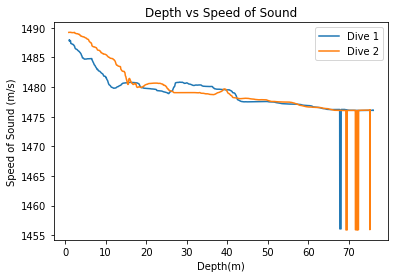

In [23]:
for i in range (0,f):
  plt.plot(graphx[i], graphy[i],label = "Dive %d" %(i+1))
plt.legend()
plt.xlabel('Depth(m)')
plt.ylabel('Speed of Sound (m/s)')
plt.title('Depth vs Speed of Sound')
plt.show()

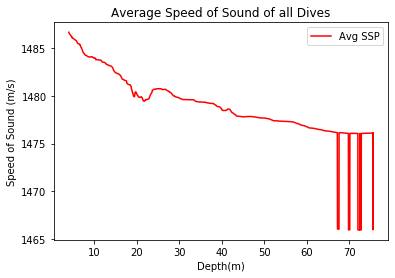

In [24]:
plt.plot(x2, y2,label = "Avg SSP", color = 'red')
plt.legend()
plt.xlabel('Depth(m)')
plt.ylabel('Speed of Sound (m/s)')
plt.title('Average Speed of Sound of all Dives')
plt.show()

In [25]:
for i in range(0,f):
  print('The max ssp value for Dive %d is %d m/s' %((i+1), r[i]))

The max ssp value for Dive 1 is 1487 m/s
The max ssp value for Dive 2 is 1489 m/s


#Oregon Offshore Cabled Shallow Profiler Mooring (Winter)

NOTE: The cells of the sections to come follow the same format as the first section.

In [0]:
url = 'https://raw.githubusercontent.com/stokljos/project-1/master/Winter%20oregon%20shallow%20moore%20profiler.csv' #Winter

In [0]:
df = pd.read_csv(url)

In [0]:
p = df['seawater_pressure'] 
s = df['practical_salinity']
t = df['seawater_temperature']
d = df['density']

In [0]:
h = (p*10000)/(d*9.81) #equation to find depth
ssp = 1449.2+(4.6*t)-(0.055*(t*t))+(0.00029*(t*t*t))+((1.34-(0.01*t))*(s-35))+(0.016*h) #speed of sound equation

In [0]:
x = h.values #depth
y = ssp.values #speed of sound

In [0]:
f = 1 #number of dives
v = []
d = 1
while d < (len(x)):
  if d!=(0,15) and d!=((q-15), q) and (x[d] - x[d-15])<0 and (x[d] - x[d+15])<0 and x[d]<21:
    f += 1
    v.append(d) #Index of each dive
    d += 1000
  d +=1

In [0]:
graphx = np.split(x,v)
graphy = np.split(y,v)


In [0]:
r = [] # max ssp values for each dive
for e in range (0,f):
  r.append(max(graphy[e]))


In [0]:
g = 3000
y2 = [] #where the avg ssp value is stored
x2 = [] #where the avg depth value is stored
while g < len(x):
  yvalue = 0
  xvalue = 0
  q = 0
  for i in range (0,f):
    if len(graphy[i][:]) <= g:
      q +=1
      continue
    else:
      yvalue +=  graphy[i][g] #adds each ssp value of the same index of each dive
      xvalue +=  graphx[i][g] #adds each depth of the same index of each dive
  if (f-q) != 0:
    yavg = yvalue/(f-q) #this finds the average of each index at each point of all dives
    xavg = xvalue/(f-q) #this finds the average of each index at each point of all dives
    y2.append(yavg)
    x2.append(xavg)
    g += 1
  else:
    break

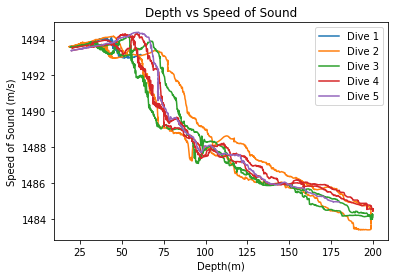

In [35]:
for i in range (0,f):
  plt.plot(graphx[i], graphy[i],label = "Dive %d" %(i+1))
plt.legend()
plt.xlabel('Depth(m)')
plt.ylabel('Speed of Sound (m/s)')
plt.title('Depth vs Speed of Sound')
plt.show()

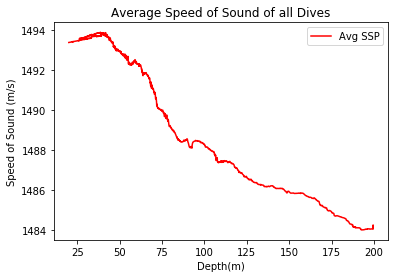

In [36]:
plt.plot(x2, y2,label = "Avg SSP", color = 'red')
plt.legend()
plt.xlabel('Depth(m)')
plt.ylabel('Speed of Sound (m/s)')
plt.title('Average Speed of Sound of all Dives')
plt.show()

In [37]:
for i in range(0,f):
  print('The max ssp value for Dive %d is %d m/s' %((i+1), r[i]))

The max ssp value for Dive 1 is 1494 m/s
The max ssp value for Dive 2 is 1494 m/s
The max ssp value for Dive 3 is 1494 m/s
The max ssp value for Dive 4 is 1494 m/s
The max ssp value for Dive 5 is 1494 m/s


#Oregon Offshore Cabled Shallow Profiler Mooring (Summer)

NOTE: The cells of the sections to come follow the same format as the first section.

In [0]:
url = 'https://raw.githubusercontent.com/stokljos/project-1/master/Summer%20oregon%20shallow%20moore%20profiler.csv' #Summer

In [0]:
df = pd.read_csv(url)

In [0]:
p = df['seawater_pressure'] 
s = df['practical_salinity']
t = df['seawater_temperature']
d = df['density']

In [0]:
h = (p*10000)/(d*9.81) #equation to find depth
ssp = 1449.2+(4.6*t)-(0.055*(t*t))+(0.00029*(t*t*t))+((1.34-(0.01*t))*(s-35))+(0.016*h) #speed of sound equation

In [0]:
x = h.values #depth
y = ssp.values #speed of sound

In [0]:
f = 1
q = len(x)
f = 1 #number of dives
v = []
d = 1
while d < (len(x)):
  if x[d]<10:
    f += 1
    v.append(d) #Index of each dive
    d += 2000
  d +=1

In [0]:
graphx = np.split(x,v)
graphy = np.split(y,v)

In [0]:
r = [] # max ssp values for each dive
for e in range (0,f):
  r.append(max(graphy[e]))

In [0]:
g = 9000
y2 = [] #where the avg ssp value is stored
x2 = [] #where the avg depth value is stored
while g < len(x):
  yvalue = 0
  xvalue = 0
  q = 0
  for i in range (0,f):
    if len(graphy[i][:]) <= g:
      q +=1
      continue
    else:
      yvalue +=  graphy[i][g] #adds each ssp value of the same index of each dive
      xvalue +=  graphx[i][g] #adds each depth of the same index of each dive
  if (f-q) != 0:
    yavg = yvalue/(f-q) #this finds the average of each index at each point of all dives
    xavg = xvalue/(f-q) #this finds the average of each index at each point of all dives
    y2.append(yavg)
    x2.append(xavg)
    g += 1
  else:
    break

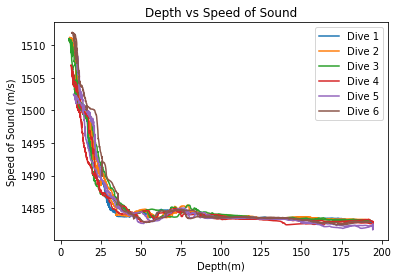

In [47]:
for i in range (0,f):
  plt.plot(graphx[i], graphy[i],label = "Dive %d" %(i+1))
plt.legend()
plt.xlabel('Depth(m)')
plt.ylabel('Speed of Sound (m/s)')
plt.title('Depth vs Speed of Sound')
plt.show()

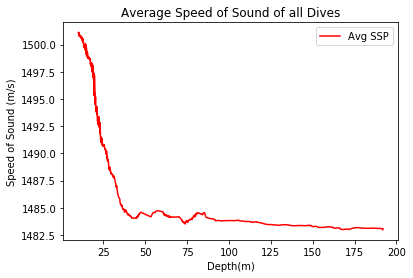

In [48]:
plt.plot(x2, y2,label = "Avg SSP", color = 'red')
plt.legend()
plt.xlabel('Depth(m)')
plt.ylabel('Speed of Sound (m/s)')
plt.title('Average Speed of Sound of all Dives')
plt.show()

In [49]:
for i in range(0,f):
  print('The max ssp value for Dive %d is %d m/s' %((i+1), r[i]))

The max ssp value for Dive 1 is 1503 m/s
The max ssp value for Dive 2 is 1511 m/s
The max ssp value for Dive 3 is 1511 m/s
The max ssp value for Dive 4 is 1506 m/s
The max ssp value for Dive 5 is 1509 m/s
The max ssp value for Dive 6 is 1511 m/s


#Oregon Offshore Cabled Deep Profiler Mooring (Winter)

NOTE: The cells of the sections to come follow the same format as the first section.

In [0]:
url = 'https://raw.githubusercontent.com/stokljos/project-1/master/Winter%20oregon%20deep%20moore%20profiler.csv' #Winter

In [0]:
df = pd.read_csv(url)

In [0]:
p = df['pressure'] 
s = df['practical_salinity']
t = df['temp']
d = df['density']

In [0]:
h = (p*10000)/(d*9.81) #equation to find depth
ssp = 1449.2+(4.6*t)-(0.055*(t*t))+(0.00029*(t*t*t))+((1.34-(0.01*t))*(s-35))+(0.016*h) #speed of sound equation

In [0]:
x = h.values #depth
y = ssp.values #speed of sound

In [0]:
f = 1 #number of dives
v = []
d = 1
while d < (len(x)):
  if d!=(0,5) and d!=((q-5), q) and (x[d] - x[d-5])<0 and (x[d] - x[d+5])<0 and x[d]<450:
    f += 1
    v.append(d) #Index of each dive
    d += 100
  d +=1

In [0]:
graphx = np.split(x,v)
graphy = np.split(y,v)


In [0]:
r = [] # max ssp values for each dive
for e in range (0,f):
  r.append(max(graphy[e]))


In [0]:
g = 65
y2 = [] #where the avg ssp value is stored
x2 = [] #where the avg depth value is stored
while g < len(x):
  yvalue = 0
  xvalue = 0
  q = 0
  for i in range (0,f):
    if len(graphy[i][:]) <= g:
      q +=1
      continue
    else:
      yvalue +=  graphy[i][g] #adds each ssp value of the same index of each dive
      xvalue +=  graphx[i][g] #adds each depth of the same index of each dive
  if (f-q) != 0:
    yavg = yvalue/(f-q) #this finds the average of each index at each point of all dives
    xavg = xvalue/(f-q) #this finds the average of each index at each point of all dives
    y2.append(yavg)
    x2.append(xavg)
    g += 1
  else:
    break

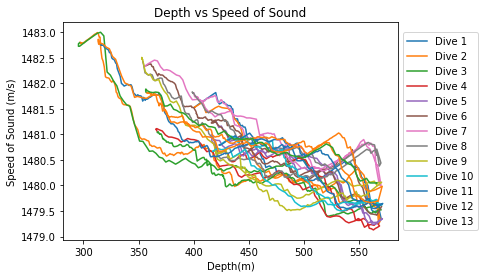

In [59]:
for i in range (0,f):
  plt.plot(graphx[i], graphy[i],label = "Dive %d" %(i+1))
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.xlabel('Depth(m)')
plt.ylabel('Speed of Sound (m/s)')
plt.title('Depth vs Speed of Sound')
plt.show()

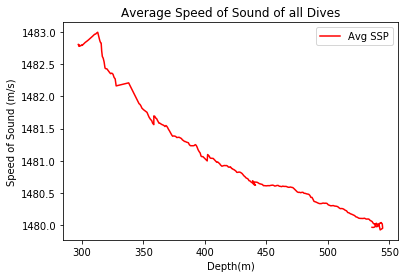

In [60]:
plt.plot(x2, y2,label = "Avg SSP", color = 'red')
plt.legend()
plt.xlabel('Depth(m)')
plt.ylabel('Speed of Sound (m/s)')
plt.title('Average Speed of Sound of all Dives')
plt.show()

In [61]:
for i in range(0,f):
  print('The max ssp value for Dive %d is %d m/s' %((i+1), r[i]))

The max ssp value for Dive 1 is 1481 m/s
The max ssp value for Dive 2 is 1482 m/s
The max ssp value for Dive 3 is 1483 m/s
The max ssp value for Dive 4 is 1481 m/s
The max ssp value for Dive 5 is 1481 m/s
The max ssp value for Dive 6 is 1482 m/s
The max ssp value for Dive 7 is 1482 m/s
The max ssp value for Dive 8 is 1482 m/s
The max ssp value for Dive 9 is 1482 m/s
The max ssp value for Dive 10 is 1480 m/s
The max ssp value for Dive 11 is 1482 m/s
The max ssp value for Dive 12 is 1482 m/s
The max ssp value for Dive 13 is 1481 m/s


#Oregon Offshore Cabled Deep Profiler Mooring (Summer)

NOTE: The cells of the sections to come follow the same format as the first section.

In [0]:
url = 'https://raw.githubusercontent.com/stokljos/project-1/master/Summer%20oregon%20deep%20moore%20profiler.csv' #Summer

In [0]:
df = pd.read_csv(url)

In [0]:
p = df['pressure'] 
s = df['practical_salinity']
t = df['temp']
d = df['density']

In [0]:
h = (p*10000)/(d*9.81) #equation to find depth
ssp = 1449.2+(4.6*t)-(0.055*(t*t))+(0.00029*(t*t*t))+((1.34-(0.01*t))*(s-35))+(0.016*h) #speed of sound equation

In [0]:
x = h.values #depth
y = ssp.values #speed of sound

In [0]:
f = 1 #number of dives
v = []
d = 1
while d < (len(x)):
  if x[d]<100:
    f += 1
    v.append(d) #Index of each dive
    d += 1000
  d +=1

In [0]:
graphx = np.split(x,v)
graphy = np.split(y,v)


In [0]:
r = [] # max ssp values for each dive
for e in range (0,f):
  r.append(max(graphy[e]))


In [0]:
g = 0
y2 = [] #where the avg ssp value is stored
x2 = [] #where the avg depth value is stored
while g < len(x):
  yvalue = 0
  xvalue = 0
  for i in range (0,f):
    if len(graphy[i][:]) <= g:
      break
    else:
      yvalue +=  graphy[i][g] #adds each ssp value of the same index of each dive
      xvalue +=  graphx[i][g] #adds each depth of the same index of each dive

  yavg = yvalue/f #this finds the average of each index at each point of all dives
  xavg = xvalue/f #this finds the average of each index at each point of all dives
  if yavg<min(y):
    break
  else:
    y2.append(yavg)
    x2.append(xavg)
    g += 1

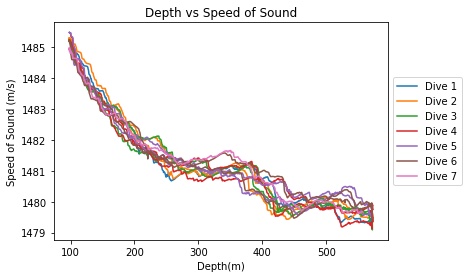

In [71]:
for i in range (0,f):
  plt.plot(graphx[i], graphy[i],label = "Dive %d" %(i+1))
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.xlabel('Depth(m)')
plt.ylabel('Speed of Sound (m/s)')
plt.title('Depth vs Speed of Sound')
plt.show()

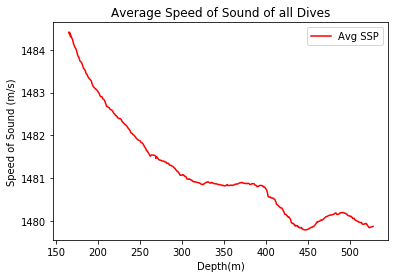

In [72]:
plt.plot(x2, y2,label = "Avg SSP", color = 'red')
plt.legend()
plt.xlabel('Depth(m)')
plt.ylabel('Speed of Sound (m/s)')
plt.title('Average Speed of Sound of all Dives')
plt.show()

In [73]:
for i in range(0,f):
  print('The max ssp value for Dive %d is %d m/s' %((i+1), r[i]))

The max ssp value for Dive 1 is 1485 m/s
The max ssp value for Dive 2 is 1485 m/s
The max ssp value for Dive 3 is 1485 m/s
The max ssp value for Dive 4 is 1485 m/s
The max ssp value for Dive 5 is 1485 m/s
The max ssp value for Dive 6 is 1485 m/s
The max ssp value for Dive 7 is 1484 m/s


#Oregon Slope Base Shallow Profiler (Winter)

NOTE: The cells of the sections to come follow the same format as the first section.

In [0]:
url = 'https://raw.githubusercontent.com/stokljos/project-1/master/Winter%20Oregon%20slope%20base%20Shallow%20Profiler.csv' #Winter

In [0]:
df = pd.read_csv(url)

In [0]:
p = df['seawater_pressure'] 
s = df['practical_salinity']
t = df['seawater_temperature']
d = df['density']

In [0]:
h = (p*10000)/(d*9.81) #equation to find depth
ssp = 1449.2+(4.6*t)-(0.055*(t*t))+(0.00029*(t*t*t))+((1.34-(0.01*t))*(s-35))+(0.016*h) #speed of sound equation

In [0]:
x = h.values #depth
y = ssp.values #speed of sound

In [0]:
f = 1 #number of dives
v = []
d = 0
while d < (len(x)):
  if x[d]<20:
    f += 1
    v.append(d) #Index of each dive
    d += 2000
  d +=1

In [80]:
graphx = np.split(x,v)
graphy = np.split(y,v)
graphx[2][7750]

189.04430571344338

In [0]:
r = [] # max ssp values for each dive
for e in range (0,f):
  r.append(max(graphy[e]))

In [0]:
g = 9000
y2 = [] #where the avg ssp value is stored
x2 = [] #where the avg depth value is stored
while g < len(x):
  yvalue = 0
  xvalue = 0
  q = 0
  for i in range (0,f):
    if len(graphy[i][:]) <= g:
      q +=1
      continue
    else:
      yvalue +=  graphy[i][g] #adds each ssp value of the same index of each dive
      xvalue +=  graphx[i][g] #adds each depth of the same index of each dive
  if (f-q) != 0:
    yavg = yvalue/(f-q) #this finds the average of each index at each point of all dives
    xavg = xvalue/(f-q) #this finds the average of each index at each point of all dives
    y2.append(yavg)
    x2.append(xavg)
    g += 1
  else:
    break

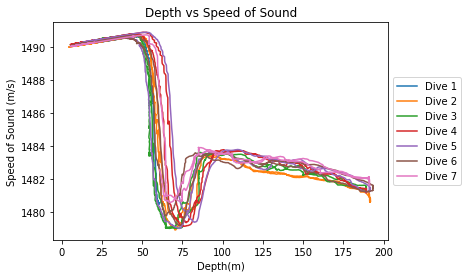

In [83]:
for i in range (0,f):
  plt.plot(graphx[i], graphy[i],label = "Dive %d" %(i+1))
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.xlabel('Depth(m)')
plt.ylabel('Speed of Sound (m/s)')
plt.title('Depth vs Speed of Sound')
plt.show()

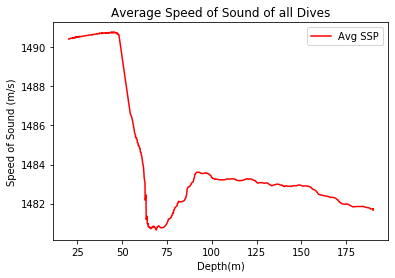

In [84]:
plt.plot(x2, y2,label = "Avg SSP", color = 'red')
plt.legend()
plt.xlabel('Depth(m)')
plt.ylabel('Speed of Sound (m/s)')
plt.title('Average Speed of Sound of all Dives')
plt.show()

In [85]:
for i in range(0,f):
  print('The max ssp value for Dive %d is %d m/s' %((i+1), r[i]))

The max ssp value for Dive 1 is 1490 m/s
The max ssp value for Dive 2 is 1490 m/s
The max ssp value for Dive 3 is 1490 m/s
The max ssp value for Dive 4 is 1490 m/s
The max ssp value for Dive 5 is 1490 m/s
The max ssp value for Dive 6 is 1490 m/s
The max ssp value for Dive 7 is 1490 m/s


#Oregon Slope Base Shallow Profiler (Summer)

NOTE: The cells of the sections to come follow the same format as the first section.

In [0]:
url = 'https://raw.githubusercontent.com/stokljos/project-1/master/Summer%20Oregon%20slope%20base%20Shallow%20Profiler.csv' #Summer

In [0]:
df = pd.read_csv(url)

In [0]:
p = df['seawater_pressure'] 
s = df['practical_salinity']
t = df['seawater_temperature']
d = df['density']

In [0]:
h = (p*10000)/(d*9.81) #equation to find depth
ssp = 1449.2+(4.6*t)-(0.055*(t*t))+(0.00029*(t*t*t))+((1.34-(0.01*t))*(s-35))+(0.016*h) #speed of sound equation

In [0]:
x = h.values #depth
y = ssp.values #speed of sound

In [0]:
f = 1 #number of dives
v = []
d = 1
while d < (len(x)):
  if x[d]<20:
    f += 1
    v.append(d) #Index of each dive
    d += 5000
  d +=1

In [0]:
graphx = np.split(x,v)
graphy = np.split(y,v)


In [0]:
r = [] # max ssp values for each dive
for e in range (0,f):
  r.append(max(graphy[e]))


In [0]:
g = 14000
y2 = [] #where the avg ssp value is stored
x2 = [] #where the avg depth value is stored
while g < len(x):
  yvalue = 0
  xvalue = 0
  q = 1
  for i in range (1,f):
    if len(graphy[i][:]) <= g:
      q +=1
      continue
    else:
      yvalue +=  graphy[i][g] #adds each ssp value of the same index of each dive
      xvalue +=  graphx[i][g] #adds each depth of the same index of each dive
  if (f-q) != 0:
    yavg = yvalue/(f-q) #this finds the average of each index at each point of all dives
    xavg = xvalue/(f-q) #this finds the average of each index at each point of all dives
    y2.append(yavg)
    x2.append(xavg)
    g += 1
  else:
    break

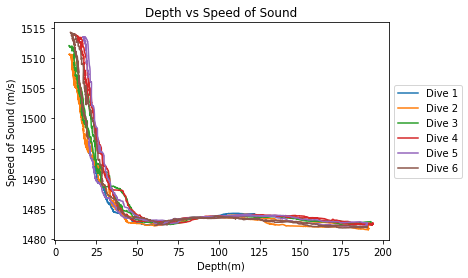

In [95]:
for i in range (0,f):
  plt.plot(graphx[i], graphy[i],label = "Dive %d" %(i+1))
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.xlabel('Depth(m)')
plt.ylabel('Speed of Sound (m/s)')
plt.title('Depth vs Speed of Sound')
plt.show()

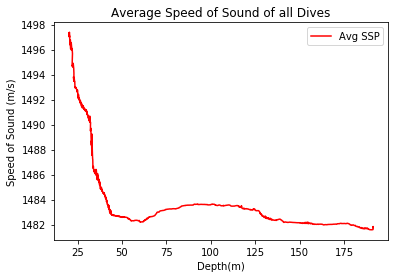

In [96]:
plt.plot(x2, y2,label = "Avg SSP", color = 'red')
plt.legend()
plt.xlabel('Depth(m)')
plt.ylabel('Speed of Sound (m/s)')
plt.title('Average Speed of Sound of all Dives')
plt.show()

In [97]:
for i in range(0,f):
  print('The max ssp value for Dive %d is %d m/s' %((i+1), r[i]))

The max ssp value for Dive 1 is 1494 m/s
The max ssp value for Dive 2 is 1510 m/s
The max ssp value for Dive 3 is 1512 m/s
The max ssp value for Dive 4 is 1513 m/s
The max ssp value for Dive 5 is 1513 m/s
The max ssp value for Dive 6 is 1514 m/s


#Oregon Slope Base Deep Profiler (Winter)

NOTE: The cells of the sections to come follow the same format as the first section.

In [0]:
url = 'https://raw.githubusercontent.com/stokljos/project-1/master/Winter%20Oregon%20slope%20base%20Deep%20Profiler.csv' #Winter

In [0]:
df = pd.read_csv(url)

In [0]:
p = df['pressure'] 
s = df['practical_salinity']
t = df['temp']
d = df['density']

In [0]:
h = (p*10000)/(d*9.81) #equation to find depth
ssp = 1449.2+(4.6*t)-(0.055*(t*t))+(0.00029*(t*t*t))+((1.34-(0.01*t))*(s-35))+(0.016*h) #speed of sound equation

In [0]:
x = h.values #depth
y = ssp.values #speed of sound

In [0]:
f = 1 #number of dives
v = []
d = 1
while d < (len(x)):
  if  x[d]<890:
    f += 1
    v.append(d) #Index of each dive
    d += 100
  d +=1

In [0]:
graphx = np.split(x,v)
graphy = np.split(y,v)


In [0]:
r = [] # max ssp values for each dive
for e in range (0,f):
  r.append(max(graphy[e]))


In [0]:
g = 700
y2 = [] #where the avg ssp value is stored
x2 = [] #where the avg depth value is stored
while g < len(x):
  yvalue = 0
  xvalue = 0
  q = 0
  for i in range (0,f):
    if len(graphy[i][:]) <= g:
      q +=1
      continue
    else:
      yvalue +=  graphy[i][g] #adds each ssp value of the same index of each dive
      xvalue +=  graphx[i][g] #adds each depth of the same index of each dive
  if (f-q) != 0:
    yavg = yvalue/(f-q) #this finds the average of each index at each point of all dives
    xavg = xvalue/(f-q) #this finds the average of each index at each point of all dives
    y2.append(yavg)
    x2.append(xavg)
    g += 1
  else:
    break

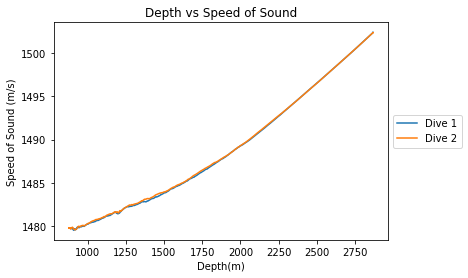

In [107]:
for i in range (0,f):
  plt.plot(graphx[i], graphy[i],label = "Dive %d" %(i+1))
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.xlabel('Depth(m)')
plt.ylabel('Speed of Sound (m/s)')
plt.title('Depth vs Speed of Sound')
plt.show()

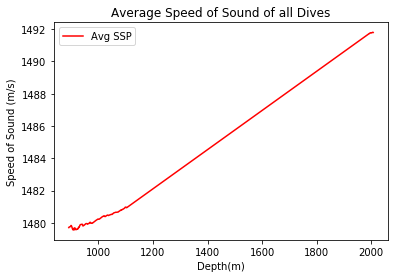

In [108]:
plt.plot(x2, y2,label = "Avg SSP", color = 'red')
plt.legend()
plt.xlabel('Depth(m)')
plt.ylabel('Speed of Sound (m/s)')
plt.title('Average Speed of Sound of all Dives')
plt.show()

In [109]:
for i in range(0,f):
  print('The max ssp value for Dive %d is %d m/s' %((i+1), r[i]))

The max ssp value for Dive 1 is 1502 m/s
The max ssp value for Dive 2 is 1502 m/s


#Oregon Slope Base Deep Profiler  (Summer)

NOTE: The cells of the sections to come follow the same format as the first section.

In [0]:
url = 'https://raw.githubusercontent.com/stokljos/project-1/master/Summer%20Oregon%20slope%20base%20Deep%20Profiler.csv' #Summer

In [0]:
df = pd.read_csv(url)

In [0]:
p = df['pressure'] 
s = df['practical_salinity']
t = df['temp']
d = df['density']

In [0]:
h = (p*10000)/(d*9.81) #equation to find depth
ssp = 1449.2+(4.6*t)-(0.055*(t*t))+(0.00029*(t*t*t))+((1.34-(0.01*t))*(s-35))+(0.016*h) #speed of sound equation

In [0]:
x = h.values #depth
y = ssp.values #speed of sound

In [0]:
f = 1 #number of dives
v = []
d = 1
while d < (len(x)):
  if x[d]<788:
    f += 1
    v.append(d) #Index of each dive
    d += 1000
  d +=1

In [0]:
graphx = np.split(x,v)
graphy = np.split(y,v)


In [0]:
r = [] # max ssp values for each dive
for e in range (0,f):
  r.append(max(graphy[e]))


In [0]:
g = 7500
y2 = [] #where the avg ssp value is stored
x2 = [] #where the avg depth value is stored
while g < len(x):
  yvalue = 0
  xvalue = 0
  q = 0
  for i in range (0,f):
    if len(graphy[i][:]) <= g:
      q +=1
      continue
    else:
      yvalue +=  graphy[i][g] #adds each ssp value of the same index of each dive
      xvalue +=  graphx[i][g] #adds each depth of the same index of each dive
  if (f-q) != 0:
    yavg = yvalue/(f-q) #this finds the average of each index at each point of all dives
    xavg = xvalue/(f-q) #this finds the average of each index at each point of all dives
    y2.append(yavg)
    x2.append(xavg)
    g += 1
  else:
    break

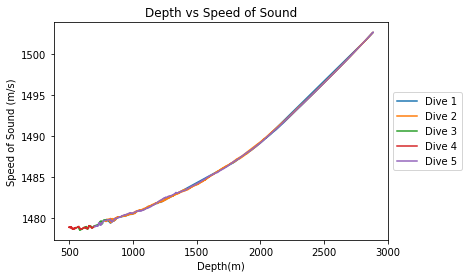

In [119]:
for i in range (0,f):
  plt.plot(graphx[i], graphy[i],label = "Dive %d" %(i+1))
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.xlabel('Depth(m)')
plt.ylabel('Speed of Sound (m/s)')
plt.title('Depth vs Speed of Sound')
plt.show()

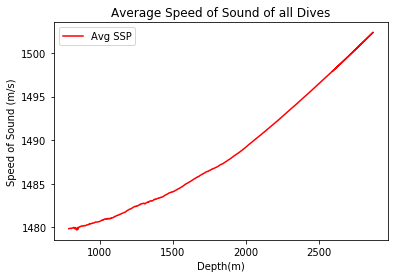

In [120]:
plt.plot(x2, y2,label = "Avg SSP", color = 'red')
plt.legend()
plt.xlabel('Depth(m)')
plt.ylabel('Speed of Sound (m/s)')
plt.title('Average Speed of Sound of all Dives')
plt.show()

In [121]:
for i in range(0,f):
  print('The max ssp value for Dive %d is %d m/s' %((i+1), r[i]))

The max ssp value for Dive 1 is 1502 m/s
The max ssp value for Dive 2 is 1502 m/s
The max ssp value for Dive 3 is 1479 m/s
The max ssp value for Dive 4 is 1479 m/s
The max ssp value for Dive 5 is 1502 m/s


#Axial Base Shallow Profiler  (Winter)

NOTE: The cells of the sections to come follow the same format as the first section.

In [0]:
url = 'https://raw.githubusercontent.com/stokljos/project-1/master/winter%20axial%20base%20shallow%20profiler.csv' #Winter

In [0]:
df = pd.read_csv(url)

In [0]:
p = df['seawater_pressure'] 
s = df['practical_salinity']
t = df['seawater_temperature']
d = df['density']

In [0]:
h = (p*10000)/(d*9.81) #equation to find depth
ssp = 1449.2+(4.6*t)-(0.055*(t*t))+(0.00029*(t*t*t))+((1.34-(0.01*t))*(s-35))+(0.016*h) #speed of sound equation

In [0]:
x = h.values #depth
y = ssp.values #speed of sound

In [0]:
f = 1 #number of dives
v = []
d = 1
while d < (len(x)):
  if x[d]<10:
    f += 1
    v.append(d) #Index of each dive
    d += 5000
  d +=1

In [0]:
graphx = np.split(x,v)
graphy = np.split(y,v)


In [0]:
r = [] # max ssp values for each dive
for e in range (0,f):
  r.append(max(graphy[e]))


In [0]:
g = 9000
y2 = [] #where the avg ssp value is stored
x2 = [] #where the avg depth value is stored
while g < len(x):
  yvalue = 0
  xvalue = 0
  q = 0
  for i in range (0,f):
    if len(graphy[i][:]) <= g:
      q +=1
      continue
    else:
      yvalue +=  graphy[i][g] #adds each ssp value of the same index of each dive
      xvalue +=  graphx[i][g] #adds each depth of the same index of each dive
  if (f-q) != 0:
    yavg = yvalue/(f-q) #this finds the average of each index at each point of all dives
    xavg = xvalue/(f-q) #this finds the average of each index at each point of all dives
    y2.append(yavg)
    x2.append(xavg)
    g += 1
  else:
    break

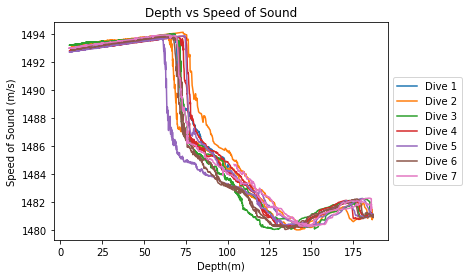

In [131]:
for i in range (0,f):
  plt.plot(graphx[i], graphy[i],label = "Dive %d" %(i+1))
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.xlabel('Depth(m)')
plt.ylabel('Speed of Sound (m/s)')
plt.title('Depth vs Speed of Sound')
plt.show()

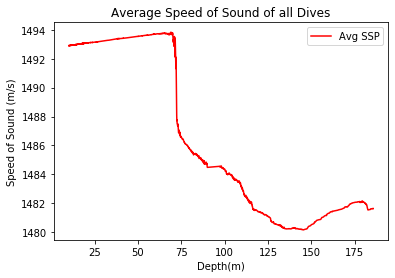

In [132]:
plt.plot(x2, y2,label = "Avg SSP", color = 'red')
plt.legend()
plt.xlabel('Depth(m)')
plt.ylabel('Speed of Sound (m/s)')
plt.title('Average Speed of Sound of all Dives')
plt.show()

In [133]:
for i in range(0,f):
  print('The max ssp value for Dive %d is %d m/s' %((i+1), r[i]))

The max ssp value for Dive 1 is 1494 m/s
The max ssp value for Dive 2 is 1494 m/s
The max ssp value for Dive 3 is 1494 m/s
The max ssp value for Dive 4 is 1493 m/s
The max ssp value for Dive 5 is 1493 m/s
The max ssp value for Dive 6 is 1493 m/s
The max ssp value for Dive 7 is 1493 m/s


#Axial Base Shallow Profiler  (Summer)

NOTE: The cells of the sections to come follow the same format as the first section.

In [0]:
url = 'https://raw.githubusercontent.com/stokljos/project-1/master/Summer%20axial%20base%20shallow%20profiler.csv' #Summer

In [0]:
df = pd.read_csv(url)

In [0]:
p = df['seawater_pressure'] 
s = df['practical_salinity']
t = df['seawater_temperature']
d = df['density']

In [0]:
h = (p*10000)/(d*9.81) #equation to find depth
ssp = 1449.2+(4.6*t)-(0.055*(t*t))+(0.00029*(t*t*t))+((1.34-(0.01*t))*(s-35))+(0.016*h) #speed of sound equation

In [0]:
x = h.values #depth
y = ssp.values #speed of sound

In [0]:
f = 1 #number of dives
v = []
d = 1
while d < (len(x)):
  if x[d]<20:
    f += 1
    v.append(d) #Index of each dive
    d += 5000
  d +=1

In [0]:
graphx = np.split(x,v)
graphy = np.split(y,v)


In [0]:
r = [] # max ssp values for each dive
for e in range (0,f):
  r.append(max(graphy[e]))


In [0]:
g = 9500
y2 = [] #where the avg ssp value is stored
x2 = [] #where the avg depth value is stored
while g < len(x):
  yvalue = 0
  xvalue = 0
  q = 0
  for i in range (0,f):
    if len(graphy[i][:]) <= g:
      q +=1
      continue
    else:
      yvalue +=  graphy[i][g] #adds each ssp value of the same index of each dive
      xvalue +=  graphx[i][g] #adds each depth of the same index of each dive
  if (f-q) != 0:
    yavg = yvalue/(f-q) #this finds the average of each index at each point of all dives
    xavg = xvalue/(f-q) #this finds the average of each index at each point of all dives
    y2.append(yavg)
    x2.append(xavg)
    g += 1
  else:
    break

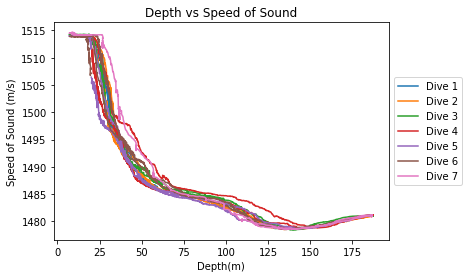

In [143]:
for i in range (0,f):
  plt.plot(graphx[i], graphy[i],label = "Dive %d" %(i+1))
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.xlabel('Depth(m)')
plt.ylabel('Speed of Sound (m/s)')
plt.title('Depth vs Speed of Sound')
plt.show()

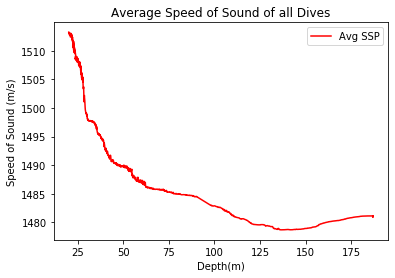

In [144]:
plt.plot(x2, y2,label = "Avg SSP", color = 'red')
plt.legend()
plt.xlabel('Depth(m)')
plt.ylabel('Speed of Sound (m/s)')
plt.title('Average Speed of Sound of all Dives')
plt.show()

In [145]:
for i in range(0,f):
  print('The max ssp value for Dive %d is %d m/s' %((i+1), r[i]))

The max ssp value for Dive 1 is 1513 m/s
The max ssp value for Dive 2 is 1514 m/s
The max ssp value for Dive 3 is 1514 m/s
The max ssp value for Dive 4 is 1514 m/s
The max ssp value for Dive 5 is 1514 m/s
The max ssp value for Dive 6 is 1514 m/s
The max ssp value for Dive 7 is 1514 m/s


#Axial Base Deep Profiler  (Winter)

NOTE: The cells of the sections to come follow the same format as the first section.

In [0]:
url = 'https://raw.githubusercontent.com/stokljos/project-1/master/winter%20Axial%20Base%20Deep%20Profiler.csv' #Winter

In [0]:
df = pd.read_csv(url)

In [0]:
p = df['pressure'] 
s = df['practical_salinity']
t = df['temp']
d = df['density']

In [0]:
h = (p*10000)/(d*9.81) #equation to find depth
ssp = 1449.2+(4.6*t)-(0.055*(t*t))+(0.00029*(t*t*t))+((1.34-(0.01*t))*(s-35))+(0.016*h) #speed of sound equation

In [0]:
x = h.values #depth
y = ssp.values #speed of sound

In [0]:
f = 1 #number of dives
v = []
d = 1
while d < (len(x)):
  if x[d]<630:
    f += 1
    v.append(d) #Index of each dive
    d += 5000
  d +=1

In [0]:
graphx = np.split(x,v)
graphy = np.split(y,v)


In [0]:
r = [] # max ssp values for each dive
for e in range (0,f):
  r.append(max(graphy[e]))


In [0]:
g =8750
y2 = [] #where the avg ssp value is stored
x2 = [] #where the avg depth value is stored
while g < len(x):
  yvalue = 0
  xvalue = 0
  q = 0
  for i in range (0,f):
    if len(graphy[i][:]) <= g:
      q +=1
      continue
    else:
      yvalue +=  graphy[i][g] #adds each ssp value of the same index of each dive
      xvalue +=  graphx[i][g] #adds each depth of the same index of each dive
  if (f-q) != 0:
    yavg = yvalue/(f-q) #this finds the average of each index at each point of all dives
    xavg = xvalue/(f-q) #this finds the average of each index at each point of all dives
    y2.append(yavg)
    x2.append(xavg)
    g += 1
  else:
    break

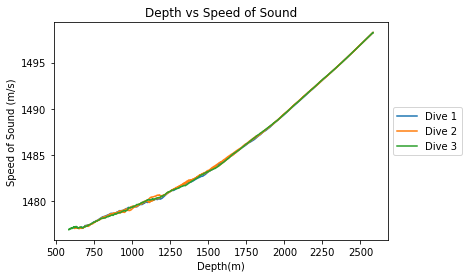

In [155]:
for i in range (0,f):
  plt.plot(graphx[i], graphy[i],label = "Dive %d" %(i+1))
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.xlabel('Depth(m)')
plt.ylabel('Speed of Sound (m/s)')
plt.title('Depth vs Speed of Sound')
plt.show()

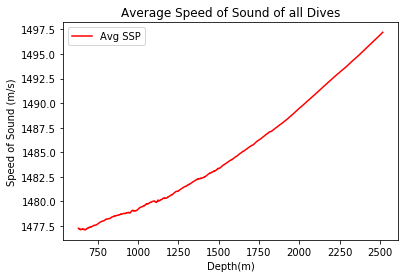

In [156]:
plt.plot(x2, y2,label = "Avg SSP", color = 'red')
plt.legend()
plt.xlabel('Depth(m)')
plt.ylabel('Speed of Sound (m/s)')
plt.title('Average Speed of Sound of all Dives')
plt.show()

In [157]:
for i in range(0,f):
  print('The max ssp value for Dive %d is %d m/s' %((i+1), r[i]))

The max ssp value for Dive 1 is 1498 m/s
The max ssp value for Dive 2 is 1498 m/s
The max ssp value for Dive 3 is 1498 m/s


#Axial Base Deep Profiler  (Summer)

NOTE: The cells of the sections to come follow the same format as the first section.

In [0]:
url = 'https://raw.githubusercontent.com/stokljos/project-1/master/Summer%20Axial%20Base%20Deep%20Profiler.csv' #Summer

In [0]:
df = pd.read_csv(url)

In [0]:
p = df['pressure'] 
s = df['practical_salinity']
t = df['temp']
d = df['density']

In [0]:
h = (p*10000)/(d*9.81) #equation to find depth
ssp = 1449.2+(4.6*t)-(0.055*(t*t))+(0.00029*(t*t*t))+((1.34-(0.01*t))*(s-35))+(0.016*h) #speed of sound equation

In [0]:
x = h.values #depth
y = ssp.values #speed of sound

In [0]:
f = 1 #number of dives
v = []
d = 1
while d < (len(x)):
  if x[d]<500:
    f += 1
    v.append(d) #Index of each dive
    d += 500
  d +=1

In [0]:
graphx = np.split(x,v)
graphy = np.split(y,v)


In [0]:
r = [] # max ssp values for each dive
for e in range (0,f):
  r.append(max(graphy[e]))


In [0]:
g = 8500
y2 = [] #where the avg ssp value is stored
x2 = [] #where the avg depth value is stored
while g < len(x):
  yvalue = 0
  xvalue = 0
  q = 0
  for i in range (0,f):
    if len(graphy[i][:]) <= g:
      q +=1
      continue
    else:
      yvalue +=  graphy[i][g] #adds each ssp value of the same index of each dive
      xvalue +=  graphx[i][g] #adds each depth of the same index of each dive
  if (f-q) != 0:
    yavg = yvalue/(f-q) #this finds the average of each index at each point of all dives
    xavg = xvalue/(f-q) #this finds the average of each index at each point of all dives
    y2.append(yavg)
    x2.append(xavg)
    g += 1
  else:
    break

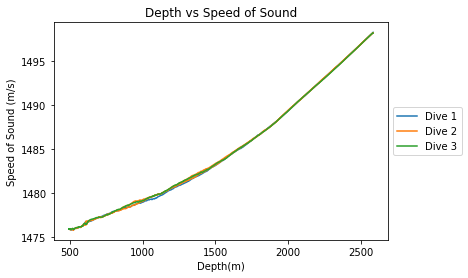

In [167]:
for i in range (0,f):
  plt.plot(graphx[i], graphy[i],label = "Dive %d" %(i+1))
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.xlabel('Depth(m)')
plt.ylabel('Speed of Sound (m/s)')
plt.title('Depth vs Speed of Sound')
plt.show()

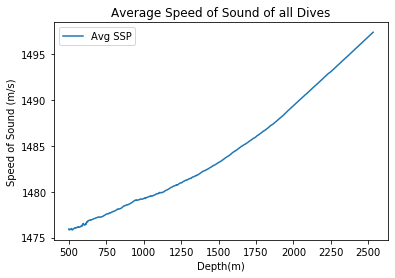

In [168]:
plt.plot(x2, y2,label = "Avg SSP")
plt.legend()
plt.xlabel('Depth(m)')
plt.ylabel('Speed of Sound (m/s)')
plt.title('Average Speed of Sound of all Dives')
plt.show()

In [169]:
for i in range(0,f):
  print('The max ssp value for Dive %d is %d m/s' %((i+1), r[i]))

The max ssp value for Dive 1 is 1498 m/s
The max ssp value for Dive 2 is 1498 m/s
The max ssp value for Dive 3 is 1498 m/s
